# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [139]:
m = 1
A = 0.125#0.12699485911198283#0.04
run = 1

twod=true
zeroformat=false

## grid
Agrid=0.35
kgrid=0.4#0.7
mgrid=0.6#0.5#0.55
fgrid=5

5

In [140]:
function compactify(r)
    return r/(1+r)
end

function uncompactify(x)
    return x/(1-x)
end

uncompactify (generic function with 1 method)

Choose your grid

In [141]:
global compactified=true
global loggrid=true

global bisection=true

true

In [142]:
using Quadmath, Printf

res=m;
N=2.0^m*200.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=10.0#Float128(1.0);
end

dx=Xf/N#Float128(Xf/N);
if loggrid==false
    dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
else
    dt=0.1*round(dx,digits=10)
end
Nt=2.0^m*200.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [143]:
iter=1

1

In [144]:
print(N)

200.0

In [145]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [146]:
using Printf
include("./ScalarField.jl");
#include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [147]:

if loggrid==true
    ori=(tan(-mgrid/Agrid)/fgrid+kgrid)#0.0#Float128(0.0)#0.0;
    Xf=(tan((1-mgrid)/Agrid)/fgrid+kgrid)
else
    ori=0.0
    Xf=1.0
end

dx=(Xf-ori)/N

initX1 = nothing

initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
#initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX1)+6;
println("step size is  ", dx)
println("the time step is ", dt)

initX=[ori-3*dx; ori-2*dx; ori-dx; collect(initX1); Xf+dx; Xf+2*dx; Xf+3*dx];

step size is  -0.004728899177579221
the time step is 0.0005


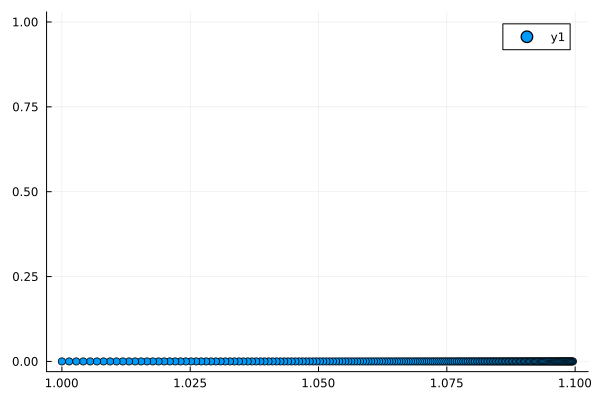

In [151]:
using Plots
scatter(inverse.(initX1), zeros(length(initX1)))#, ylim=[-1,1],xlim=[0,1])

# Initial data of m β Ψ and Ψ,x

In [149]:
initX1

1.7842521881348867:-0.004728899177579221:0.8384723526190425

In [23]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7
sigma=0.3


#PSI,R FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)

state_array[:,4] = initderpsi
state_array=ghost(state_array)

####
if loggrid==true
    derpsi_func = Spline1D(inverse(initX[4:L-3]), state_array[4:L-3,4],  k=4);
else
    derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
end;

In [24]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [25]:
y0=[0.0, 0.0, 0.0]#Float128.([0.0 0.0 0.0])

state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

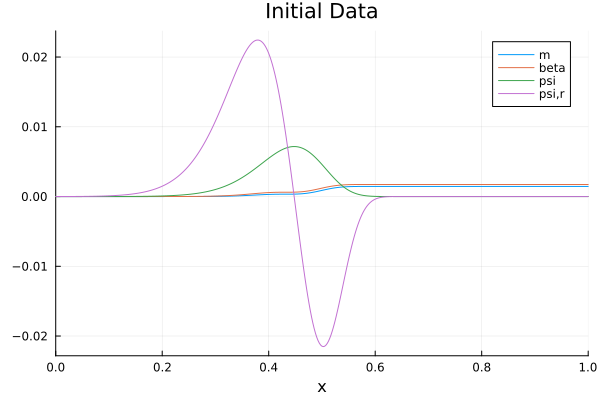

In [27]:
using Plots #showing initial data and the initial status of the horizon finder
plot(inverse(initX[4:L-3]), state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,r"],xlim=[0,1])

In [28]:
monitor_ratio=zeros(L)
global monitor_ratio[5:L-4] = 2 .* state_array[5:L-4,1] ./ inverse(initX[5:L-4]) .* (1 .- inverse(initX[5:L-4]));

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [29]:
using Tables

global files=["m", "beta", "psi", "derpsi"]

#print_muninn(files, t, state_array[:,1:5],res,"a")
print_muninn(files, 0, state_array[:,1:5],res,"w")

In [30]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [31]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx)/dt)

1.0844499847829054


In [32]:
using Base.Threads
Threads.nthreads()

4

In [33]:
#global dt=5e-5

 ## Time evolution

fixed grid

In [34]:
finaltime=3.0
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 100 dt is 5.4222499239144725e-5, t=0.005422249923914474 speed is 0.45330182039868305, dx/dt=25.75921600374637
 monitor ratio is 0.002348192879281632

iteration 200 dt is 5.42224992391445e-5, t=0.010844499847828917 speed is 0.45330182039868494, dx/dt=25.759216003746477
 monitor ratio is 0.002353720229617573

iteration 300 dt is 5.422249923914424e-5, t=0.01626674977174334 speed is 0.4533018203986871, dx/dt=25.7592160037466
 monitor ratio is 0.002359060208784516

iteration 400 dt is 5.422249923914393e-5, t=0.02168899969565761 speed is 0.45330182039868966, dx/dt=25.759216003746747
 monitor ratio is 0.0023642168910760434

iteration 500 dt is 5.4222499239143614e-5, t=0.027111249619571877 speed is 0.4533018203986923, dx/dt=25.759216003746896
 monitor ratio is 0.002369979844510378

iteration 600 dt is 5.4222499239143214e-5, t=0.032533499543486145 speed is 0.45330182039869565, dx/dt=25.75921600374709
 monitor ratio is 0.0023756032261163804

iteration 700 dt is 5.4222499239142794e-5,

 monitor ratio is 0.0026609120946201794

Hessian is really big!

10094.787056284502 time is 0.28309566852709606


#### 

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

In [460]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 18400:1:18400
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res1/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    scatter!(initX1, [plot1], labels=["monitor ratio"])# ylim=[0, 1],xlim=[0, 1])# |> display 

    end

gif(anim, "anim_res$res.gif", fps = 1500)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res1/monitor_ratio18400.csv" is not a valid file or doesn't exist

In [420]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 710:710
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0.0, 0.1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/moniter_ratio14000.csv" is not a valid file or doesn't exist

In [750]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8000:100:10000
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step8000.csv" is not a valid file or doesn't exist

In [751]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio8200.csv" is not a valid file or doesn't exist

Sanity check for der func

In [207]:
array=init_gaussian(originalX,0.7,0.3,0.01)
arrayloggrid=init_gaussian(initX,0.7,0.3,0.01);

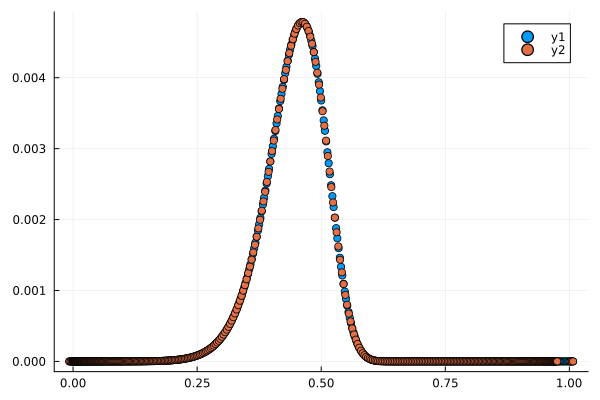

In [209]:
scatter([originalX, initX], [array, arrayloggrid])

In [210]:
aux=zeros(L)

loggrid=false
for i in 4:L-3
    aux[i]=Dertest(array,i,originalX)
end
x1=originalX
y1=aux


loggrid=true
for i in 4:L-3
    aux[i]=Dertest(arrayloggrid,i,initX)
end
x2=initX
y2=aux;

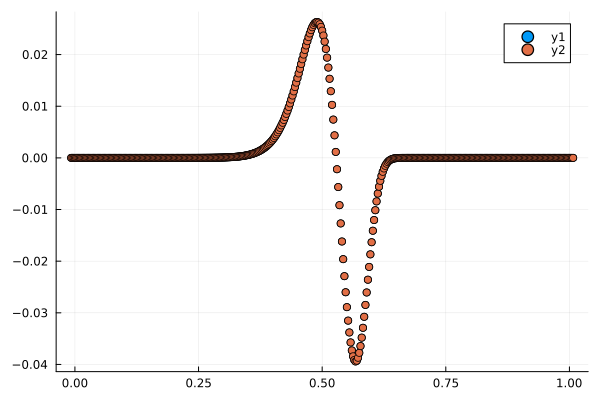

In [417]:
scatter([x1,x1],[y1,y2])